In [47]:
#Problem 1. IMPORT SAMPLE LINEAR REGRESSION DATA
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive/')
indata = pd.read_csv("drive/MyDrive/data/linear_test.txt")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Text(0, 0.5, 'Current')

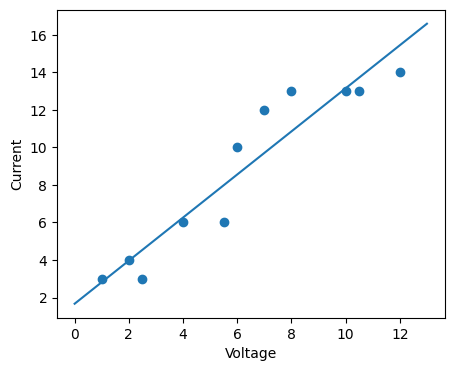

In [62]:
#FIT LINEAR MODEL
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X = np.c_[indata["Voltage"]]
y = np.c_[indata["Current"]]
model.fit(X,y)
#PLOT IT
Xf = np.linspace(0, 13, 100)
Xf = np.reshape(Xf,(100,1))
plt.figure(figsize=(5,4))
plt.plot(Xf, model.predict(Xf))
plt.scatter(X,y)
plt.xlabel("Voltage")
plt.ylabel("Current")

In [53]:
import sklearn.metrics
lin_mse = sklearn.metrics.mean_squared_error(y, model.predict(X))
lin_mse

1.908675166297118

Text(0, 0.5, 'Current')

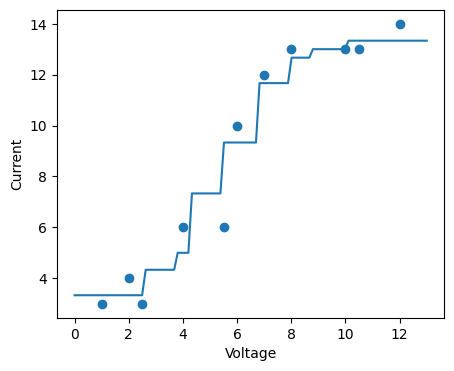

In [63]:
#FIT NEIGHBORS MODEL
import sklearn.neighbors
modelnn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
modelnn.fit(X,y)
#PLOT IT
plt.figure(figsize=(5,4))
plt.plot(Xf, modelnn.predict(Xf))
plt.scatter(X,y)
plt.xlabel("Voltage")
plt.ylabel("Current")

In [64]:
nn_mse = sklearn.metrics.mean_squared_error(y, modelnn.predict(X))
nn_mse

1.4242424242424245

We see that the NN mode has lowe MSE (1.42) than the linear model (1.9), meaning that it goes better through the data. However, it's unclear if it's a better model for the data at this point. The latter would require applying the model to test data outside of the training set to check its generalizability. The jagged appearance of the NN model though are indications of overfitting.

In [65]:
#Problem 2. IMPORT SAMPLE MULTI-LINEAR REGRESSION DATA
indata = pd.read_table("drive/MyDrive/data/hw1_data.txt")

In [66]:
indata.head()

,feature 1,feature 2,label
0,1,1,6.959249
1,1,4,10.035060
2,3,3,10.815027
3,5,3,12.258169
4,6,4,13.477990


In [69]:
#FIT LINEAR MODEL
X = np.c_[indata[["feature 1", "feature 2"]]]
y = np.c_[indata["label"]]
model.fit(X,y)

LinearRegression()

In [70]:
# Model parameters after fit: y = coef[0] f1 + coef[1] f2 + intercept
slope = model.coef_
intercept = model.intercept_
slope, intercept

(array([[0.79047681, 1.02019984]]), array([4.97008414]))

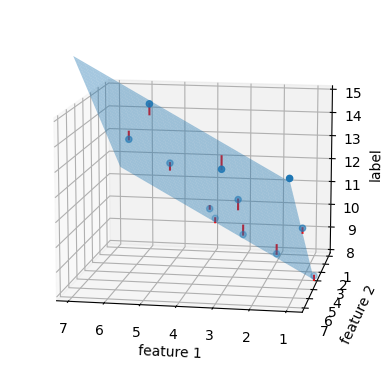

In [71]:
# visualization, with help from gemini
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(indata["feature 1"], indata["feature 2"], indata["label"])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('label')

# Create the surface
num1 = np.arange(1, 7, 0.1)
num2 = np.arange(1, 7, 0.1)
Xmesh1, Xmesh2 = np.meshgrid(num1, num2)
# Create the input for prediction, combining the meshgrid data
Xmesh = np.c_[Xmesh1.ravel(), Xmesh2.ravel()] # Combine the two arrays

ax.set_zlim(8, 15)

# plot red lines to show distance of data points to the plane of best fit
for i, j, k in zip(indata["feature 1"], indata["feature 2"], indata["label"]):
  prediction = model.predict(np.array([[i,j]]))[0][0]
  ax.plot([i, i], [j, j], [prediction, k], color='red')

Y = model.predict(Xmesh)

# Reshape Y to match the meshgrid for plotting
Y = Y.reshape(Xmesh1.shape)

# Plot the surface
ax.plot_surface(Xmesh1, Xmesh2, Y, alpha=0.4)

# Add interaction for rotation
ax.view_init(elev=12, azim=100) # Initial view angle

plt.show()



The data do lie close to a plane so the linear model seems good (given the limitted number of data given).